In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [6]:
valor_m2 = dados['Valor m2']
valor_m2.head()

0    10.00
1    13.56
2    51.02
3    55.55
4    18.46
Name: Valor m2, dtype: float64

In [17]:
Q1 = valor_m2.quantile(.25)
Q1

21.25

In [18]:
Q3 = valor_m2.quantile(.75)
Q3

42.31

In [21]:
IIQ = Q3 - Q1
IIQ.round(2)

21.06

In [24]:
limite_inferior = Q1 - 1.5 * IIQ
limite_inferior.round(2)

-10.34

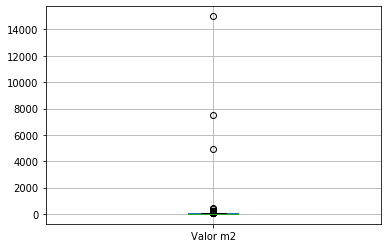

In [13]:
dados.boxplot(['Valor m2'])

In [25]:
limite_superior = Q3 + 1.5 * IIQ
limite_superior.round(2)

73.9

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b872710>]],
      dtype=object)

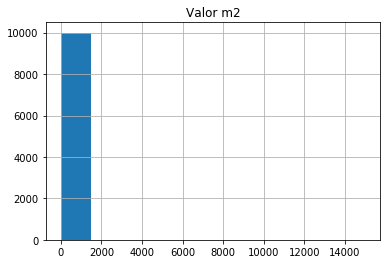

In [14]:
dados.hist(['Valor m2'])

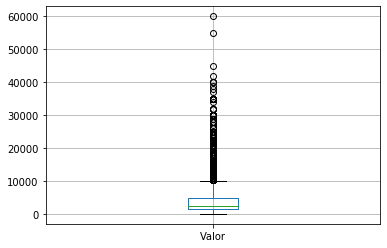

In [15]:
selecao = (valor_m2 >= limite_inferior) & (valor_m2 <= limite_superior)
dados_filtrados = dados[selecao]
dados_filtrados.boxplot(['Valor'])

# Exercício 2

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

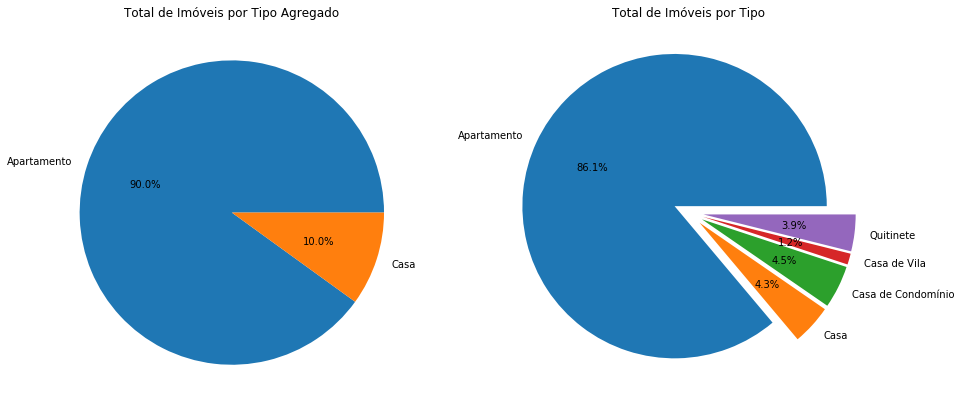

In [32]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')